In [ ]:
#importing libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

**𝐐𝟏.𝐓𝐡𝐞 𝐟𝐮𝐧𝐜𝐭𝐢𝐨𝐧 𝐝𝐨𝐦𝐈𝐧𝐭𝐞𝐧𝐬𝐢𝐭𝐲 (𝐢𝐦, 𝐤) 𝐭𝐚𝐤𝐞𝐬 𝐚 𝐠𝐫𝐞𝐲 𝐢𝐦𝐚𝐠𝐞 “𝐢𝐦” 𝐚𝐧𝐝 𝐚𝐧 𝐢𝐧𝐭𝐞𝐠𝐞𝐫 “𝐤” 𝐚𝐬 𝐢𝐧𝐩𝐮𝐭 𝐚𝐧𝐝 𝐫𝐞𝐭𝐮𝐫𝐧𝐬 𝐚 𝐥𝐢𝐬𝐭 𝐨𝐟 𝐤 𝐦𝐨𝐬𝐭 𝐟𝐫𝐞𝐪𝐮𝐞𝐧𝐭𝐥𝐲 𝐨𝐜𝐜𝐮𝐫𝐫𝐢𝐧𝐠 𝐠𝐫𝐞𝐲-𝐥𝐞𝐯𝐞𝐥 𝐢𝐧𝐭𝐞𝐧𝐬𝐢𝐭𝐲 𝐢𝐧 𝐭𝐡𝐚𝐭 𝐢𝐦𝐚𝐠𝐞. 𝟏. 𝐈𝐦𝐩𝐥𝐞𝐦𝐞𝐧𝐭 𝐭𝐡𝐞 𝐟𝐮𝐧𝐜𝐭𝐢𝐨𝐧 𝐝𝐨𝐦𝐈𝐧𝐭𝐞𝐧𝐬𝐢𝐭𝐲(𝐢𝐦, 𝐤). 𝟐. 𝐈𝐦𝐩𝐥𝐞𝐦𝐞𝐧𝐭 𝐚 𝐝𝐢𝐬𝐩𝐥𝐚𝐲 𝐟𝐮𝐧𝐜𝐭𝐢𝐨𝐧 𝐰𝐡𝐢𝐜𝐡 𝐭𝐚𝐤𝐞𝐬 𝐭𝐡𝐞 𝐢𝐦𝐚𝐠𝐞 𝐢𝐦 𝐚𝐬 𝐢𝐧𝐩𝐮𝐭, 𝐭𝐡𝐞 𝐥𝐢𝐬𝐭 𝐫𝐞𝐭𝐮𝐫𝐧𝐞𝐝 𝐛𝐲 𝐝𝐨𝐦𝐈𝐧𝐭𝐞𝐧𝐬𝐢𝐭𝐲(𝐢𝐦, 𝐤) 𝐚𝐧𝐝 𝐝𝐢𝐬𝐩𝐥𝐚𝐲𝐬 𝐭𝐡𝐞 𝐢𝐦𝐚𝐠𝐞. 𝐀 𝐬𝐚𝐦𝐩𝐥𝐞 𝐨𝐮𝐭𝐩𝐮𝐭 𝐢𝐬 𝐝𝐞𝐦𝐨𝐧𝐬𝐭𝐫𝐚𝐭𝐞𝐝 𝐢𝐧 𝐅𝐢𝐠𝐮𝐫𝐞 𝟏**

In [ ]:
def domIntensity(im,k):
    #here we are using a dictionary(key->value) pair
    #intensityVal(intensityValue-> number of pixels with this intensity) 
    #where initially we will have all 0-255 keys initialised with 0
    
    intensityVal = {}
    kMostFrequent=[]
    
    #initializing dictionary
    for i in range(0,256):
        intensityVal[i]=0;
    
    #getting width and height of the image im
    w=im.shape[0]
    h=im.shape[1]
    
    #incrementing the count if for all the pixels
    for i in range(0,w):
        for j in range(0,h):
            intensityVal[im[i][j]]+=1;
    
    
    #sorting the dictionary based on its values and in reverse order(descending order)
    #so that we can get k highest/frequent values
    intensityVal=sorted(intensityVal.items(), key = lambda kv:(kv[1], kv[0]),reverse=True);
    
    #we have a list kMostFrequent 
    #where we are appending first k keys(i.e. intensity values)
    
    a=0;
    for key,val in intensityVal:
        if(a>=k):
            break    
        kMostFrequent.append(key);
        a+=1;

    
    return kMostFrequent;

In [ ]:
def displayFunction(im,kMostFrequent):
    
    #displaying the original image
    fig=plt.figure(figsize=(10,10))
    plt.gray()
    fig.add_subplot(3,1,1)
    plt.imshow(img)
    plt.title("Original Image")

    #displaying the dominant Intensity
    dominantIntensity=kMostFrequent[0]*np.ones((256,256))
    fig.add_subplot(3,1,2)
    plt.imshow(dominantIntensity)
    plt.title("Dominant Intensity")
    
    #creating a color palette from kMostFrequent Intesities and displaying it
    color = np.zeros((40,40),dtype='uint8')
    palette = np.ones((256,256))
    for i in kMostFrequent:
        color = i*np.ones((256,256))
        palette = np.concatenate((palette,color),axis=1)
    palette=palette[:,256:]
    fig.add_subplot(3,1,3)
    plt.imshow(palette)
    plt.title("INTENSITY PALETTE")
    

Enter value of k: 10
[156, 155, 154, 153, 142, 129, 143, 157, 128, 152]


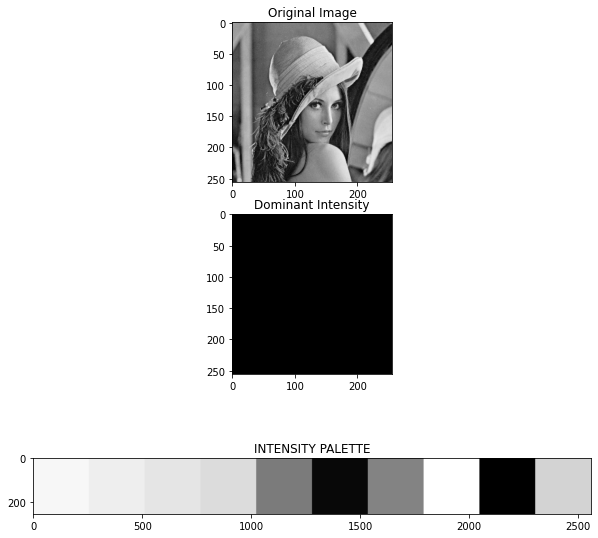

In [ ]:
#reading image
img=cv2.imread('lena_gray_256.jpg',0)
k=int(input('Enter value of k: '))
kMostFrequent=domIntensity(img,k);
print(kMostFrequent)
displayFunction(img,kMostFrequent);

**Q2. Write a hand coded program to perform a geometric transformation with an affine transformation 
matrix. T. Implement bilinear interpolation for obtaining the intensity values wherever needed. Apply it to 
the cameraman.jpg image to do the following transformations. Compare the result with inbuilt function. 
• Translate to the right by 25 pixels and down 30 pixels. 
• Expand by a factor of 2.0 horizontally and shrink by a factor of two vertically**

In [ ]:
def affine_transform(img, T):
    # Get input image dimensions
    h, w = img.shape
    
    # Create output image array
    out = np.zeros((h, w))
    
    # Compute inverse transformation matrix
    T_inv = np.linalg.inv(T)
    
    # Loop over output image pixels and compute corresponding input image pixel
    for y_out in range(h):
        for x_out in range(w):
            # Compute input image pixel coordinates
            p_out = np.array([x_out, y_out, 1])
            p_in = np.dot(T_inv, p_out)
            x_in, y_in = p_in[0]/p_in[2], p_in[1]/p_in[2]
            
            # Compute integer pixel coordinates for interpolation
            x1, y1 = int(np.floor(x_in)), int(np.floor(y_in))
            x2, y2 = x1+1, y1+1
            
            # Check if coordinates are within input image bounds
            if x1 >= 0 and x2 < w and y1 >= 0 and y2 < h:
                # Compute interpolation weights
                wx = x_in - x1
                wy = y_in - y1
                
                # Perform bilinear interpolation
                f00 = img[y1, x1]
                f01 = img[y1, x2]
                f10 = img[y2, x1]
                f11 = img[y2, x2]
                f_interp = (1-wx)*(1-wy)*f00 + wx*(1-wy)*f01 + (1-wx)*wy*f10 + wx*wy*f11
                
                # Set output pixel to interpolated value
                out[y_out, x_out] = f_interp
    
    return out

Text(0.5, 1.0, 'Scaled Image OpenCV')

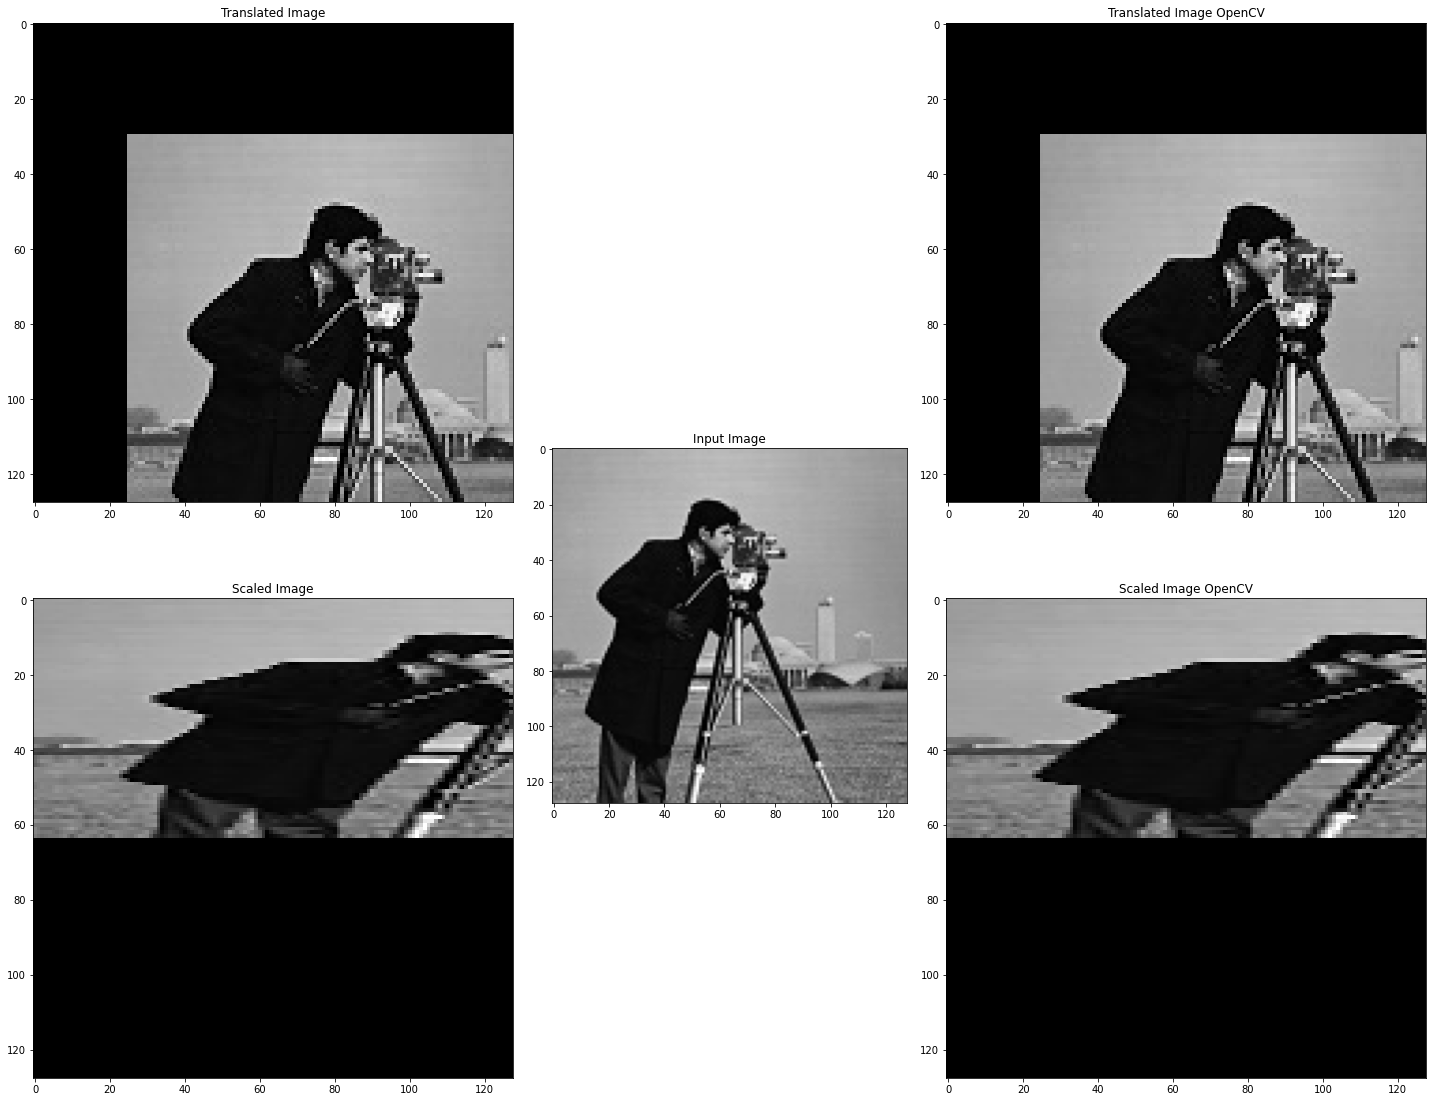

In [ ]:
# Load the image
img = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Define transformation matrices for translation and scaling
T_translate = np.array([[1, 0, 25], [0, 1, 30], [0, 0, 1]],dtype=np.float32)
T_scale = np.array([[2, 0, 0], [0, 0.5, 0], [0, 0, 1]],dtype=np.float32)

# Apply translation and scaling transformations using affine_transform function
out_translate = affine_transform(img, T_translate)
out_scale = affine_transform(img, T_scale)

# Apply translation and scaling transformations using OpenCV functions
output1_cv = cv2.warpAffine(img, T_translate[:2, :], (img.shape[1], img.shape[0]))
output2_cv = cv2.warpAffine(img, T_scale[:2, :], (img.shape[1], img.shape[0]))

# Display the input image and the transformed images
fig=plt.figure(figsize=(30,30))
fig.add_subplot(4,1,2)
plt.imshow(img)
plt.title('Input Image')

fig.add_subplot(3,2,1)
plt.imshow(out_translate)
plt.title('Translated Image')


fig.add_subplot(3,2,2)
plt.imshow(output1_cv)
plt.title('Translated Image OpenCV')

fig.add_subplot(3,2,3)
plt.imshow(out_scale)
plt.title('Scaled Image')

fig.add_subplot(3,2,4)
plt.imshow(output2_cv)
plt.title('Scaled Image OpenCV')


**Q3. Write a function histogramEqualization(image) to stretch the image contrast. Using this function to 
enhance the image histogram3.jpg and compare it with inbuilt function result.**

In [ ]:
import numpy as np
import cv2

def histogramEqualization(image):
    # Calculate the histogram
    hist, bins = np.histogram(image.flatten(), 256, [0, 256])
    
    # Calculate the cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf / cdf.max()
    
    # Compute a new image by mapping each pixel value to its corresponding normalized CDF value
    new_image = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    new_image = (new_image * 255).astype(np.uint8).reshape(image.shape)
    
    return new_image

Text(0.5, 1.0, 'Equalized Image (OpenCV Function)')

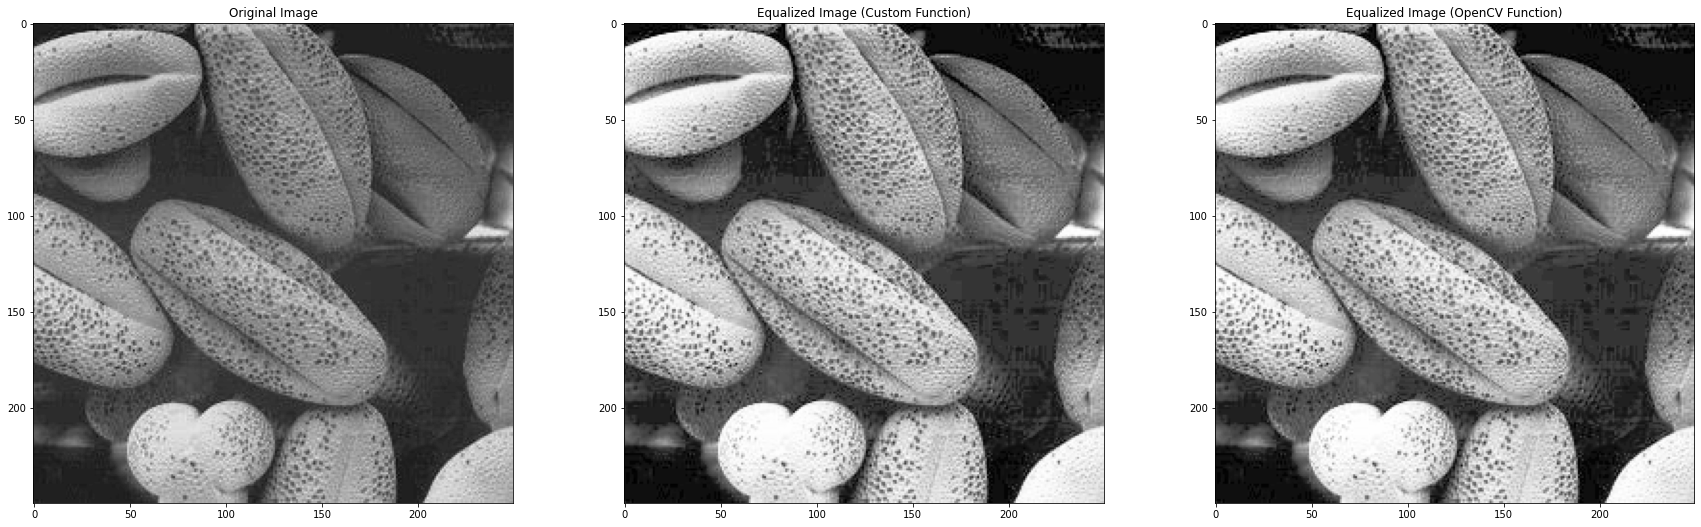

In [ ]:
# Load the image
image = cv2.imread('histogram3.jpg', 0)

# Perform histogram equalization
equalized_image = histogramEqualization(image)

# Perform histogram equalization using inbuilt function
equalized_image_opencv = cv2.equalizeHist(image)

fig=plt.figure(figsize=(30,30))

# Display the original and equalized images
fig.add_subplot(3,3,1)
plt.imshow(image)
plt.title('Original Image')

fig.add_subplot(3,3,2)
plt.imshow(equalized_image)
plt.title('Equalized Image (Custom Function)')

fig.add_subplot(3,3,3)
plt.imshow(equalized_image_opencv)
plt.title('Equalized Image (OpenCV Function)')

**Q4. Write functions/subroutines to design spatial filters (sizes of 3X3 and 5X5) - mean, median, Min-Max.
Apply the appropriate filter for the given noise images to enhance the image quality. Use images 
Cameraman_SandP_0.08.jpg, Camerman_G_0.05.jpg. Make observations upon comparing their outputs**

In [ ]:
#a function to add padding to an image, for a given filter size

def paddingImages(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    
    n=filter_size//2
    
    # creating a padded image of the given image
    paddedImage=np.zeros((x+n*2,y+n*2))
    
    #now assinging the pixes of original image to padded image 
    #such that padded image will be an image which has border of black color(as intialized with zeros).
    for i in range(x):
        for j in range(y):
            paddedImage[n+i][n+j]=img[i][j];
    
    return paddedImage;

In [ ]:
def maxFilter(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2;
    
    #initalizing the final image that we will obtain after applying the spatial filter
    maxFilterImage=np.zeros(img.shape);
    #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #we are assigning the maximum value from a filter_size*filter_size matrix of paddedImage
    for i in range(n,n+x):
        for j in range(n,n+y):
            maxFilterImage[i-n][j-n]=np.max(paddedImage[i-n:i+n+1,j-n:j+n+1])
    return maxFilterImage;

In [ ]:
def minFilter(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2;
    
    #initalizing the final image that we will obtain after applying the spatial filter
    minFilterImage=np.zeros(img.shape);
     #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #we are assigning the minimum value from a filter_size*filter_size matrix of paddedImage
    for i in range(n,n+x):
        for j in range(n,n+y):
            minFilterImage[i-n][j-n]=np.min(paddedImage[i-n:i+n+1,j-n:j+n+1])
    return minFilterImage;

In [ ]:
def meanFilter(img,filter_size): 
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2
    
    #initalizing the final image that we will obtain after applying the spatial filter
    meanFilterImage=np.zeros(img.shape);
    #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #we are assigning the mean value from a filter_size*filter_size matrix of paddedImage,
    #we changed the datatype to float32
    for i in range(n,n+x):
        for j in range(n,n+y):
            meanFilterImage[i-n][j-n]=np.mean(paddedImage[i-n:i+n+1,j-n:j+n+1],dtype=np.float32)
    return meanFilterImage;

In [ ]:
def medianFilter(img,filter_size):
    #getting width and height of the original image
    x=img.shape[0]
    y=img.shape[1]
    n=filter_size//2;
    
    #initalizing the final image that we will obtain after applying the spatial filter
    medianFilterImage=np.zeros(img.shape);
    #calling the function to get a padded image for a given original image
    paddedImage=paddingImages(img,filter_size)
    
    #here for every filter_size*filter_size matrix
    #we are using .flatten() to flatten the matrix
    #then we are sorting that falttened matrix and then the median of 
    #this matrix is assigned to final-image.
    for i in range(n,n+x):
        for j in range(n,n+y):
            temp=(paddedImage[i-n:i+n+1,j-n:j+n+1]).flatten()
            temp.sort()
            medianFilterImage[i-n][j-n]=temp[(n*n)//2];
    return medianFilterImage;

In [ ]:
img1=cv2.imread('Cameraman_SandP_0.08.jpg',0);
img2=cv2.imread('Camerman_G_0.05.jpg',0);

filter size of 3*3


Text(0.5, 1.0, 'Median filtered image 2')

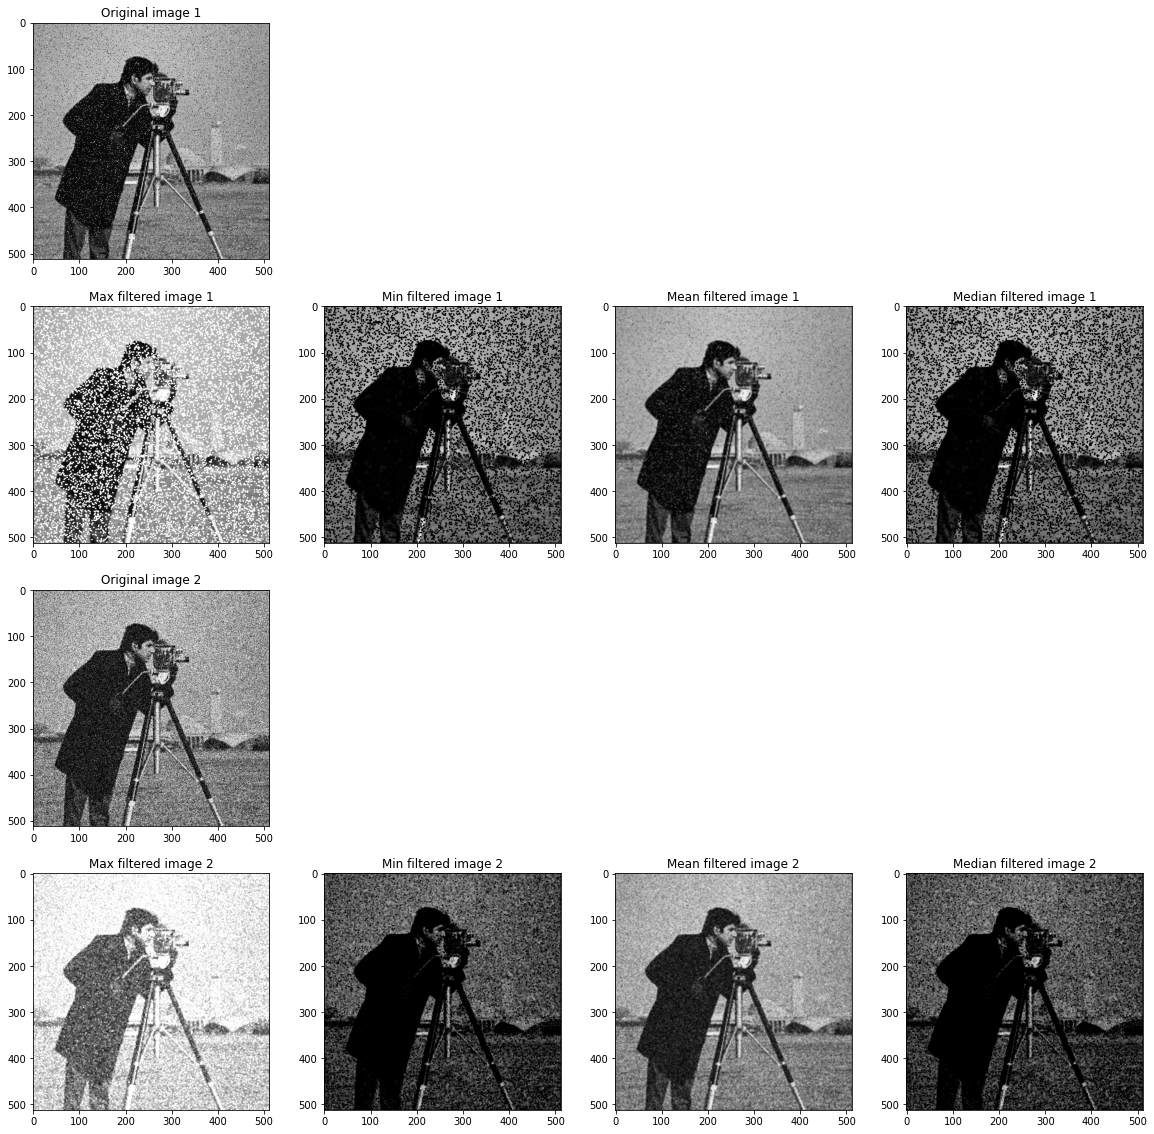

In [ ]:
# filter size of 3*3
print("filter size of 3*3")
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(4,4,1)
plt.imshow(img1)
plt.title("Original image 1")

#max filtered images
fig.add_subplot(4,4,5)
img=maxFilter(img1,3)
plt.imshow(img)
plt.title("Max filtered image 1")

#min filtered images
fig.add_subplot(4,4,6)
img=minFilter(img1,3)
plt.imshow(img)
plt.title("Min filtered image 1")

fig.add_subplot(4,4,7)
img=meanFilter(img1,3)
plt.imshow(img)
plt.title("Mean filtered image 1")

#median filtered images
fig.add_subplot(4,4,8)
img=medianFilter(img1,3)
plt.imshow(img)
plt.title("Median filtered image 1")

fig.add_subplot(4,4,9)
plt.imshow(img2)
plt.title("Original image 2")
#max filtered images
fig.add_subplot(4,4,13)
img=maxFilter(img2,3)
plt.imshow(img)
plt.title("Max filtered image 2")

#min filtered images
fig.add_subplot(4,4,14)
img=minFilter(img2,3)
plt.imshow(img)
plt.title("Min filtered image 2")

#mean filtered images
fig.add_subplot(4,4,15)
img=meanFilter(img2,3)
plt.imshow(img)
plt.title("Mean filtered image 2")

#median filtered images
fig.add_subplot(4,4,16)
img=medianFilter(img2,3)
plt.imshow(img)
plt.title("Median filtered image 2")

filter size of 5*5


Text(0.5, 1.0, 'Median filtered image 2')

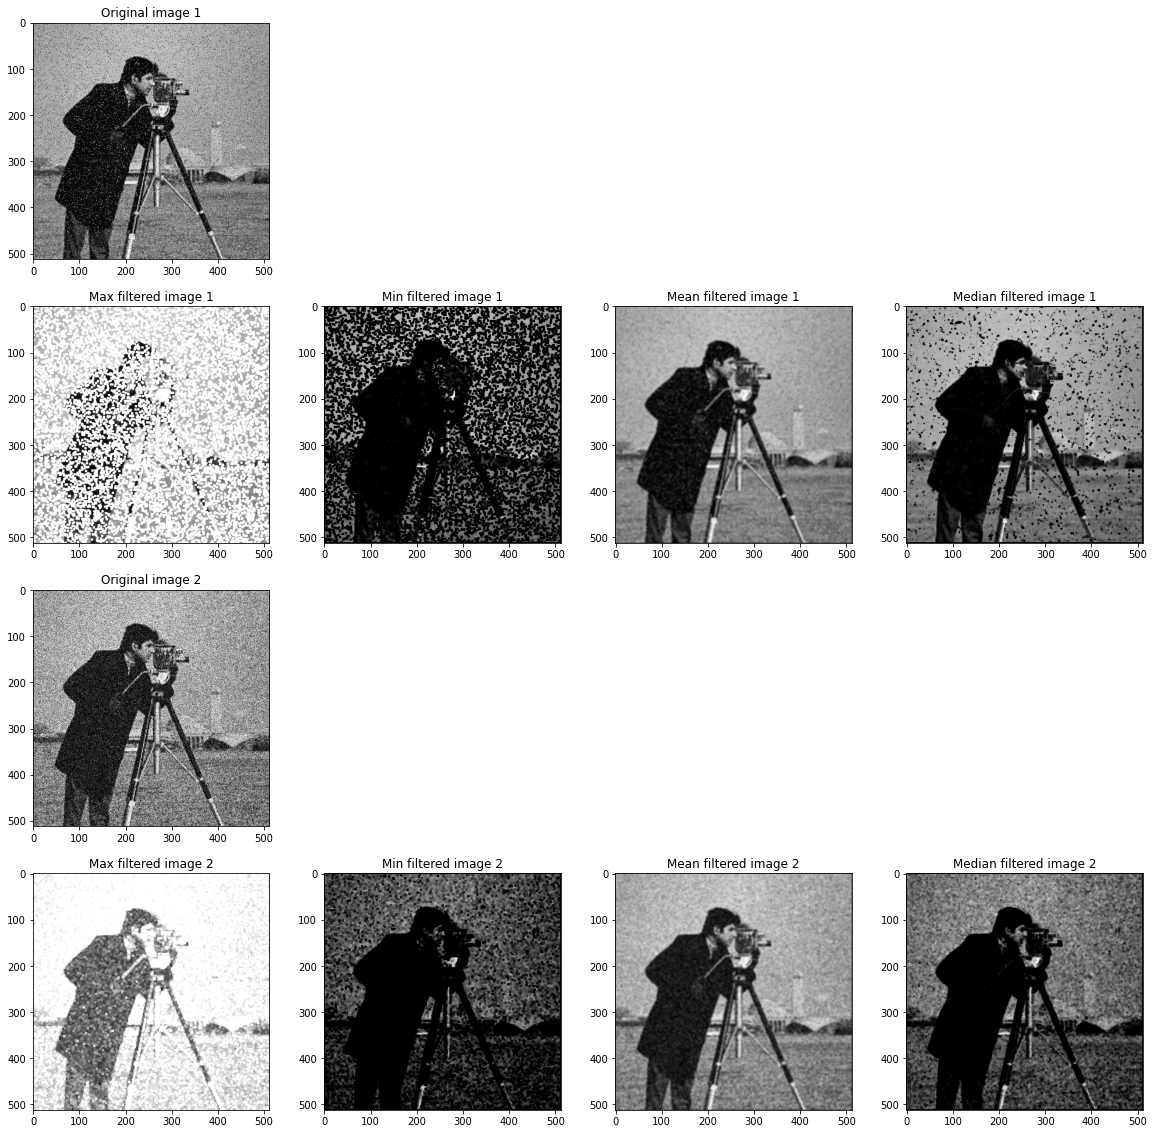

In [ ]:
# filter size of 5*5
print("filter size of 5*5")
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(4,4,1)
plt.imshow(img1)
plt.title("Original image 1")

#max filtered images
fig.add_subplot(4,4,5)
img=maxFilter(img1,5)
plt.imshow(img)
plt.title("Max filtered image 1")

#min filtered images
fig.add_subplot(4,4,6)
img=minFilter(img1,5)
plt.imshow(img)
plt.title("Min filtered image 1")

fig.add_subplot(4,4,7)
img=meanFilter(img1,5)
plt.imshow(img)
plt.title("Mean filtered image 1")

#median filtered images
fig.add_subplot(4,4,8)
img=medianFilter(img1,5)
plt.imshow(img)
plt.title("Median filtered image 1")

fig.add_subplot(4,4,9)
plt.imshow(img2)
plt.title("Original image 2")
#max filtered images
fig.add_subplot(4,4,13)
img=maxFilter(img2,5)
plt.imshow(img)
plt.title("Max filtered image 2")

#min filtered images
fig.add_subplot(4,4,14)
img=minFilter(img2,5)
plt.imshow(img)
plt.title("Min filtered image 2")

#mean filtered images
fig.add_subplot(4,4,15)
img=meanFilter(img2,5)
plt.imshow(img)
plt.title("Mean filtered image 2")

#median filtered images
fig.add_subplot(4,4,16)
img=medianFilter(img2,5)
plt.imshow(img)
plt.title("Median filtered image 2")

**Q5. Complete the function edge_detection(img) that takes an image as input and performs the following 
steps: 
• Normalizes the image to [0,1] range.
• Applies Gaussian smoothing with standard deviation 0.5 
• Computes the gradient magnitude and angle images.
• Applies non-maximal suppression to the gradient magnitude image. For non-maximum 
suppression, discretize the angle into 8 directions (or bins), where each bin accounts for 45 
degrees. For example, first bin would range from [-22.5,22.5] degrees, second bin would range 
from [22.5,67.5] degrees, and so on. 
• Returns the gradient magnitude image, angle image and gradient image after non-maximal 
suppression.
Call the edge_detection(img) function with the coins image. Display the input image and all three 
output images from your edge_detection function. 
Note: You may use built-in functions for performing Gaussian filtering and convolution operation.**

In [ ]:
def edge_detection(img):
    # Normalize the image to [0,1] range
    img = cv2.normalize(img.astype('float'), None, 0.0, 1.0, cv2.NORM_MINMAX)
    
    # Apply Gaussian smoothing with standard deviation 0.5
    img = cv2.GaussianBlur(img, (5,5), 0.5)
    
    # Compute the gradient magnitude and angle images
    sobelx = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
    grad_mag = np.sqrt(np.square(sobelx) + np.square(sobely))
    grad_angle = np.arctan2(sobely, sobelx)
    grad_angle = np.degrees(grad_angle)
    grad_angle[grad_angle < 0] += 180
    
    # Apply non-maximal suppression to the gradient magnitude image
    suppressed_grad_mag = np.zeros(grad_mag.shape)
    for i in range(1, grad_mag.shape[0]-1):
        for j in range(1, grad_mag.shape[1]-1):
            angle = grad_angle[i][j]
            mag = grad_mag[i][j]
            if (angle <= 22.5 or angle > 157.5):
                if (mag >= grad_mag[i][j-1] and mag >= grad_mag[i][j+1]):
                    suppressed_grad_mag[i][j] = mag
            elif (angle > 22.5 and angle <= 67.5):
                if (mag >= grad_mag[i-1][j-1] and mag >= grad_mag[i+1][j+1]):
                    suppressed_grad_mag[i][j] = mag
            elif (angle > 67.5 and angle <= 112.5):
                if (mag >= grad_mag[i-1][j] and mag >= grad_mag[i+1][j]):
                    suppressed_grad_mag[i][j] = mag
            elif (angle > 112.5 and angle <= 157.5):
                if (mag >= grad_mag[i-1][j+1] and mag >= grad_mag[i+1][j-1]):
                    suppressed_grad_mag[i][j] = mag
    
    return grad_mag, grad_angle, suppressed_grad_mag

Text(0.5, 1.0, 'Suppressed Gradient Magnitude Image')

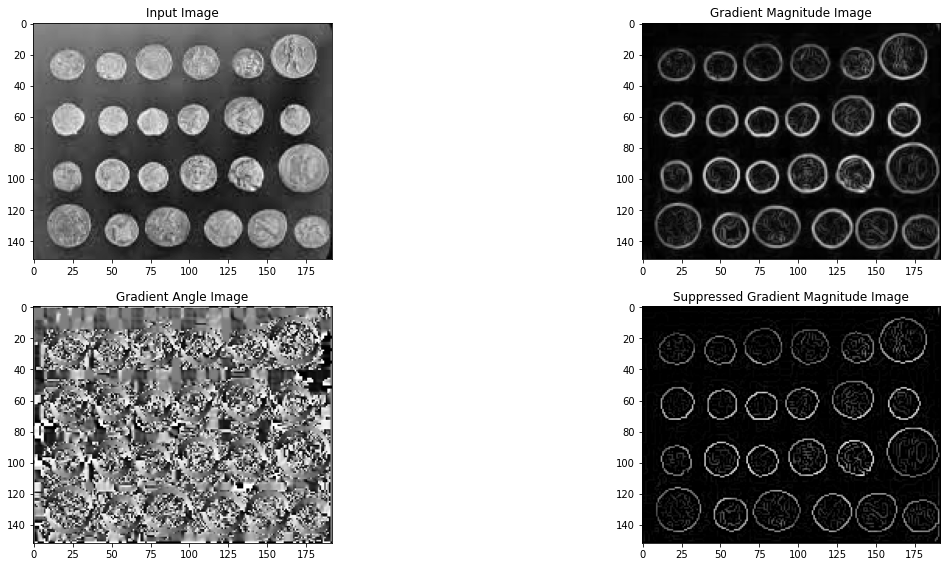

In [ ]:
# Load the image
img = cv2.imread('coins.jpeg', cv2.IMREAD_GRAYSCALE)

# Perform edge detection
grad_mag, grad_angle, suppressed_grad_mag = edge_detection(img)

# Display the input image and the output images
fig=plt.figure(figsize=(20,20))

fig.add_subplot(4,2,1)
plt.imshow(img)
plt.title('Input Image')


fig.add_subplot(4,2,2)
plt.imshow(grad_mag)
plt.title('Gradient Magnitude Image')


fig.add_subplot(4,2,3)
plt.imshow(grad_angle)
plt.title('Gradient Angle Image')

fig.add_subplot(4,2,4)
plt.imshow(suppressed_grad_mag)
plt.title('Suppressed Gradient Magnitude Image')


**Q6. Enhance the ‘skeleton.tif’ image as shown by the appropriate choice of operations**

In [ ]:
def applyFilter(img,filter):
    x=img.shape[0]
    y=img.shape[1]
    filter_size=filter.shape[0]
    
    n=filter_size//2
    
    #initalizing the final image that we will obtain after applying the filter
    imgAfterFilter=np.zeros(img.shape)
    # creating a padded image of the given image adn initialised with 0
    paddedImage=np.zeros((x+n*2,y+n*2))
    
    #now assinging the pixes of original image to padded image 
    #such that padded image will be an image which has border of black color(as intialized with zeros).
    for i in range(x):
        for j in range(y):
            paddedImage[n+i][n+j]=img[i][j];
    
    #now traversing through the and applying filter to the padded image 
    for i in range(x):
        for j in range(y):
            imgAfterFilter[i][j]=np.sum(np.multiply(filter, paddedImage[i:i + filter_size, j:j + filter_size]))
    
    return imgAfterFilter;

In [ ]:
#sobel filter
sobelX = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]],np.float32)/9


sobelY = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]],np.float32)/9


In [ ]:
#laplacian operator
laplacian = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]],np.float32)/9


Text(0.5, 1.0, 'Enhanced Image by applying power-law transformation')

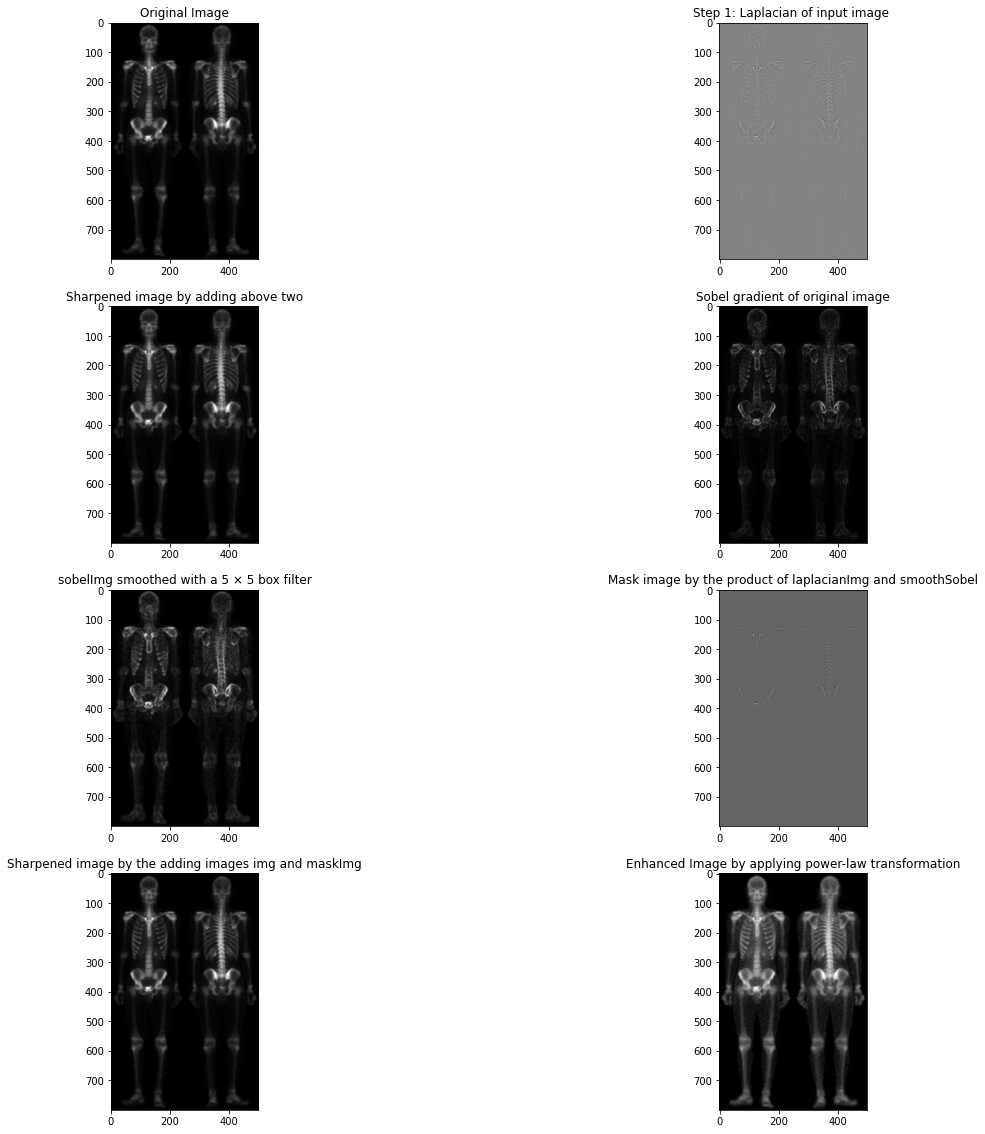

In [ ]:
#read image of whole body bone scan
img=cv2.imread('skeleton.tif',0)
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(4,2,1)
plt.imshow(img)
plt.title("Original Image")


#Laplacian of img
laplacianImg = applyFilter(img, laplacian)/9;
fig.add_subplot(4,2,2)
plt.imshow(laplacianImg)
plt.title("Step 1: Laplacian of input image ")

# Sharpened image obtained by adding (img) and (laplacianImg).
sharpImgC=laplacianImg+img;
fig.add_subplot(4,2,3)
plt.imshow(sharpImgC)
plt.title("Sharpened image by adding above two")

#Sobel gradient of image (img).
sobelImgX = applyFilter(img,sobelX)/9;

sobelImgY = applyFilter(img,sobelY)/9;
sobelImg = np.sqrt(sobelImgX**2 + sobelImgY**2)
fig.add_subplot(4,2,4)
plt.imshow(sobelImg)
plt.title("Sobel gradient of original image")


#sobelImg smoothed with a 5 × 5 box filter.
boxFilter=np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]],np.float32)/25
# img_e = convolve2d(img_d,boxFilter)
smoothSobel=applyFilter(sobelImg,boxFilter)/25;

fig.add_subplot(4,2,5)
plt.imshow(smoothSobel)
plt.title("sobelImg smoothed with a 5 × 5 box filter")


#Mask image formed by the product of (laplacianImg) and (smoothSobel).
maskImg = np.multiply(laplacianImg,smoothSobel);

fig.add_subplot(4,2,6)
plt.imshow(maskImg)
plt.title("Mask image by the product of laplacianImg and smoothSobel")


#Sharpened image obtained by the adding images (img) and (maskImg).
sharpImg=img+maskImg;
fig.add_subplot(4,2,7)
plt.imshow(sharpImg)
plt.title("Sharpened image by the adding images img and maskImg")


#Final result obtained by applying a power-law transformation to (sharpImg).
final_op = cv2.pow(sharpImg,0.6);
final_op=np.array(final_op).astype("uint8")
fig.add_subplot(4,2,8)
plt.imshow(final_op)
plt.title("Enhanced Image by applying power-law transformation")


Text(0.5, 1.0, 'Enhanced Image')

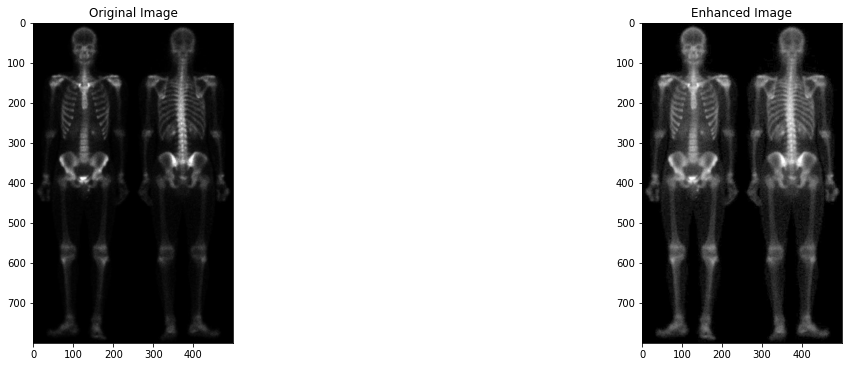

In [ ]:
# Go get the more clear view between original and final enhanced image
# displaying original image
fig=plt.figure(figsize=(20,20))
plt.gray()
fig.add_subplot(3,2,1)
plt.imshow(img)
plt.title("Original Image")

#enhanced image
fig.add_subplot(3,2,2)
plt.imshow(final_op)
plt.title("Enhanced Image")